In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.

In [2]:
data = pd.read_csv('Desktop/heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
1,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
2,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
3,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
4,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
299,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
300,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
301,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1


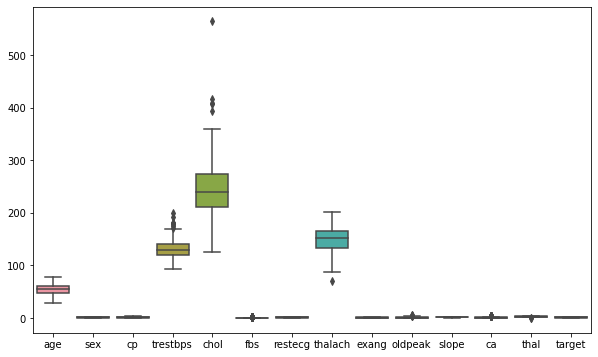

In [6]:
plt.figure(figsize=(10, 6))
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=data)

### There is some outlier in the data.

In [7]:
# scaled_data = data

In [8]:
# for i in data:
#     scaled_data[i] = (data[i]-data[i].mean())/data[i].std()
# data = pd.read_csv('Desktop/heart.csv')
cols_to_norm = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std())    

In [9]:
data['chol'].std()

0.9999999999999997

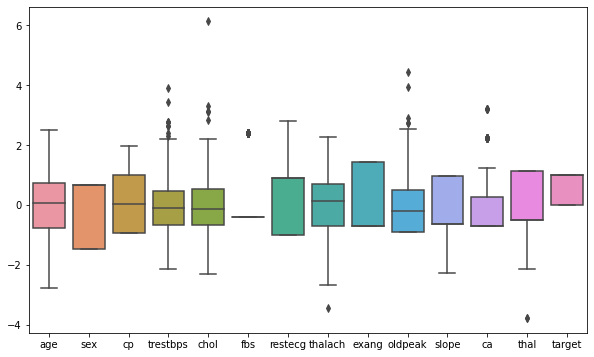

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)

In [11]:
y = pd.DataFrame(data['target'])
# del scaled_data['target']


In [12]:
out_idx_log = data.abs() > 2.5

In [13]:
out_idx = []
for i in out_idx_log:
    for j, sam in enumerate(out_idx_log[i]):        
        if(sam == True):
            out_idx.append(j)

In [14]:
len(out_idx)

35

In [15]:
y.drop(out_idx, inplace=True)

In [16]:
data.drop(out_idx , inplace=True)

In [17]:
# y=y.reset_index()


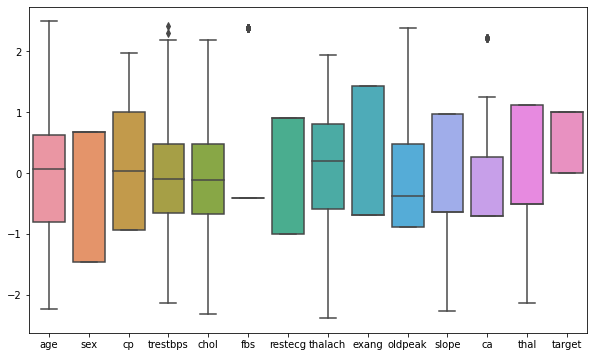

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)

In [19]:
y

,target
0,1
1,0
2,0
4,1
5,1
...,...
298,0
299,1
300,0
301,1


In [20]:
data['target'] = y

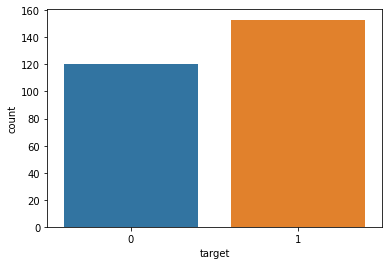

In [21]:
# sns.set_theme(style="darkgrid")
ax = sns.countplot(x='target', data=y)

# End of 1.1

# 2.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# data = pd.read_csv('Desktop/heart.csv')
# data = data.apply(lambda x: (x - x.mean()) / x.std())    
p = data[data['target'] == 1]
n = data[data['target'] == 0]

In [24]:
# data = pd.read_csv('Desktop/heart.csv')
# cols_to_norm = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std()) 
p_y = p['target']
n_y = n['target']
del p['target']
del n['target']
y = pd.DataFrame(data['target'])
del data['target']
# x = data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [26]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

## 3.

# 4.

In [27]:
p = X_train[y_train['target'] == 1]
p_y = y_train[y_train['target'] == 1]
n = X_train[y_train['target'] == 0]
n_y = y_train[y_train['target'] == 0]

In [28]:
y_train['target']

0      1
1      0
2      0
3      0
4      1
      ..
213    0
214    1
215    1
216    0
217    1
Name: target, Length: 218, dtype: int64

In [29]:
means_p = pd.DataFrame(columns=['chol','thalach','trestbps'])

In [30]:
means_n = pd.DataFrame(columns=['chol','thalach','trestbps'])

In [31]:
stds_p = pd.DataFrame(columns=['chol','thalach','trestbps'])
stds_n = pd.DataFrame(columns=['chol','thalach','trestbps'])

In [32]:
means_p = means_p.append({'chol' : p['chol'].mean(),
                    'thalach' : p['thalach'].mean(),
                    'trestbps' : p['trestbps'].mean()} , 
                    ignore_index=True)

In [33]:
means_n = means_n.append({'chol' : n['chol'].mean(),
                    'thalach' : n['thalach'].mean(),
                    'trestbps' : n['trestbps'].mean()} , 
                    ignore_index=True)

In [34]:
stds_p = stds_p.append({'chol' : p['chol'].std(),
                    'thalach' : p['thalach'].std(),
                    'trestbps' : p['trestbps'].std()} , 
                    ignore_index=True)

In [35]:
stds_n = stds_n.append({'chol' : n['chol'].std(),
                    'thalach' : n['thalach'].std(),
                    'trestbps' : n['trestbps'].std()} , 
                    ignore_index=True)

In [36]:
from math import sqrt, pi, exp

In [37]:
mean_chol_ = X_train['chol'].mean()
mean_thalach = X_train['thalach'].mean()
mean_trestbps = X_train['trestbps'].mean()

std_chol = X_train['chol'].std()
std_thalach = X_train['thalach'].std()
std_trestbps = X_train['trestbps'].std()

In [38]:
# pred = (1/(sqrt(2*pi)*stds['chol'][0])*exp(-((x-means['chol'][0])**2)/(2*stds['chol'][0])**2))

In [39]:
# pdf_chol_p = (1/(sqrt(2*pi)*stds_p['chol']))*exp(-((x['chol'][i]-means_p['chol'])**2/(2*stds_p['chol']**2)))
# pdf_thalach_p = (1/(sqrt(2*pi)*stds_p['thalach']))*exp(-((x['thalach'][i]-means_p['thalach'])**2/(2*stds_p['thalach']**2)))
# pdf_trestbps_p = (1/(sqrt(2*pi)*stds_p['trestbps']))*exp(-((x['trestbps'][i]-means_p['trestbps'])**2/(2*stds_p['trestbps']**2)))

In [40]:
pdfs_chol_p = []
pdfs_thalach_p = []
pdfs_trestbps_p = []

In [41]:
for i in range(len(X_test)):
    tmp = (1/(sqrt(2*pi)*stds_p['chol']))*exp(-((X_test['chol'][i]-means_p['chol'])**2/(2*stds_p['chol']**2)))
    pdfs_chol_p.append(tmp)
    
    tmp = (1/(sqrt(2*pi)*stds_p['thalach']))*exp(-((X_test['thalach'][i]-means_p['thalach'])**2/(2*stds_p['thalach']**2)))
    pdfs_thalach_p.append(tmp)
    
    tmp = (1/(sqrt(2*pi)*stds_p['trestbps']))*exp(-((X_test['trestbps'][i]-means_p['trestbps'])**2/(2*stds_p['trestbps']**2)))
    pdfs_trestbps_p.append(tmp)
    

In [42]:
pdfs_chol_n = []
pdfs_thalach_n = []
pdfs_trestbps_n = []

In [43]:
for i in range(len(X_test)):
    tmp = (1/(sqrt(2*pi)*stds_n['chol']))*exp(-((X_test['chol'][i]-means_n['chol'])**2/(2*stds_n['chol']**2)))
    pdfs_chol_n.append(tmp)
    
    tmp = (1/(sqrt(2*pi)*stds_n['thalach']))*exp(-((X_test['thalach'][i]-means_n['thalach'])**2/(2*stds_n['thalach']**2)))
    pdfs_thalach_n.append(tmp)
    
    tmp = (1/(sqrt(2*pi)*stds_n['trestbps']))*exp(-((X_test['trestbps'][i]-means_n['trestbps'])**2/(2*stds_n['trestbps']**2)))
    pdfs_trestbps_n.append(tmp)
    

In [44]:
prior = len(p)/(len(p) + len(n))

In [45]:
positive = []

for i in range(len(pdfs_chol_p)):
    tmp = pdfs_chol_p[i]*pdfs_thalach_p[i]*pdfs_trestbps_p[i]*prior
    positive.append(tmp)
    
    
negative = []

for i in range(len(pdfs_chol_p)):
    tmp = pdfs_chol_n[i]*pdfs_thalach_n[i]*pdfs_trestbps_n[i]*(1-prior)
    negative.append(tmp)

In [46]:
pred = []
for i in range(len(positive)):
    if(positive[i][0]>negative[i][0]):
        pred.append(1)
    else:
        pred.append(0)

In [47]:
acc = 0
for i in range(len(y_test)):
    if(y_test['target'][i] == pred[i]):
        acc += 1
acc = acc/len(pred)

In [48]:
acc

0.8181818181818182

# 5.

In [49]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred)):
    if(pred[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*precision*recall/(precision+recall)

In [50]:
print('precision=',precision)
print('recall=',recall)
print('f1-score=',f1_score)

precision= 0.7894736842105263
recall= 0.9375
f1-score= 0.8571428571428572


# 6.

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
X = X_train[['chol', 'thalach', 'trestbps']]

In [53]:
X

,chol,thalach,trestbps
0,-0.603195,0.888583,-0.662770
1,-0.333085,-0.901407,-0.662770
2,-1.201295,-1.949205,0.021453
3,-0.583901,-0.814090,-0.206622
4,-0.198030,0.102734,0.363564
...,...,...,...
213,0.265016,-0.421166,-0.662770
214,-0.294497,-0.159216,-0.092585
215,-0.062975,-0.552140,1.047787
216,-0.062975,-0.945065,1.047787


In [54]:
clf = GaussianNB()
clf.fit(np.reshape(np.array(X), (len(X), -1)), np.reshape(np.array(y_train), (len(X), )))

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
pred_1 = clf.predict(np.reshape(np.array(X_test[['chol', 'thalach', 'trestbps']]), (len(X_test),-1)))

In [56]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred_1)):
    if(pred_1[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_1[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_1[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_1 = tp/(tp+fp)
recall_1 = tp/(tp+fn)
f1_score_1 = 2*precision_1*recall_1/(precision_1+recall_1)

In [57]:
print('precision=',precision_1)
print('recall=',recall_1)
print('f1-score=',f1_score_1)

precision= 0.7894736842105263
recall= 0.9375
f1-score= 0.8571428571428572


# 7.

In [58]:
print('precision=',precision)
print('recall=',recall)
print('f1-score=',f1_score)

precision= 0.7894736842105263
recall= 0.9375
f1-score= 0.8571428571428572


# 8.

In [59]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))


In [61]:
svm.fit(np.reshape(np.array(X), (X.shape[0], -1)), np.reshape(np.array(y_train), (X.shape[0], )))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [62]:
pred_svm = svm.predict(np.reshape(np.array(X_test[['chol', 'thalach', 'trestbps']]), (X_test.shape[0],-1)))

In [63]:
pred_svm

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [64]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred_1)):
    if(pred_svm[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_svm[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_svm[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_svm = tp/(tp+fp)
recall_svm = tp/(tp+fn)
f1_score_svm = 2*precision_1*recall_1/(precision_1+recall_1)

In [65]:
print('precision=',precision_svm)
print('recall=',recall_svm)
print('f1-score=',f1_score_svm)

precision= 0.8
recall= 0.875
f1-score= 0.8571428571428572


# 9.

In [66]:
from sklearn import svm

In [67]:
# svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [68]:
lin_svm = svm.SVC(kernel='linear', gamma=2)

In [69]:
lin_svm.fit(np.reshape(np.array(X), (X.shape[0], -1)), np.reshape(np.array(y_train), (X.shape[0], )))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
pred_lin_svm = lin_svm.predict(np.reshape(np.array(X_test[['chol', 'thalach', 'trestbps']]), (X_test.shape[0],-1)))

In [71]:
pred_lin_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [72]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred_lin_svm)):
    if(pred_lin_svm[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_lin_svm[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_lin_svm[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_lin_svm = tp/(tp+fp)
recall_lin_svm = tp/(tp+fn)
f1_score_lin_svm = 2*precision_1*recall_1/(precision_1+recall_1)

In [73]:
print('precision=',precision_lin_svm)
print('recall=',recall_lin_svm)
print('f1-score=',f1_score_lin_svm)

precision= 0.8108108108108109
recall= 0.9375
f1-score= 0.8571428571428572


In [74]:
rbf_svm = svm.SVC(kernel='rbf', gamma=2)

In [75]:
rbf_svm.fit(np.reshape(np.array(X), (X.shape[0], -1)), np.reshape(np.array(y_train), (X.shape[0], )))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [76]:
pred_rbf_svm = rbf_svm.predict(np.reshape(np.array(X_test[['chol', 'thalach', 'trestbps']]), (X_test.shape[0],-1)))

In [77]:
pred_rbf_svm

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [78]:
tp = 0
fp = 0
fn = 0
for i in range(len(pred_lin_svm)):
    if(pred_rbf_svm[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_rbf_svm[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_rbf_svm[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_rbf_svm = tp/(tp+fp)
recall_rbf_svm = tp/(tp+fn)
f1_score_rbf_svm = 2*precision_1*recall_1/(precision_1+recall_1)

In [79]:
print('precision=',precision_rbf_svm)
print('recall=',recall_rbf_svm)
print('f1-score=',f1_score_rbf_svm)

precision= 0.7741935483870968
recall= 0.75
f1-score= 0.8571428571428572


# 10.

In [80]:
svm_total = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_total.fit(np.reshape(np.array(X_train), (X.shape[0], -1)), np.reshape(np.array(y_train), (X.shape[0], )))
pred_svm_total = svm_total.predict(np.reshape(np.array(X_test), (X_test.shape[0],-1)))

tp = 0
fp = 0
fn = 0
for i in range(len(pred_1)):
    if(pred_svm_total[i] == 1 and y_test['target'][i] == 1):
        tp += 1
    elif(pred_svm_total[i] == 1 and y_test['target'][i] == 0):
        fp += 1
    elif(pred_svm_total[i] == 0 and y_test['target'][i] == 1):
        fn += 1
precision_svm_total = tp/(tp+fp)
recall_svm_total = tp/(tp+fn)
f1_score_svm_total = 2*precision_1*recall_1/(precision_1+recall_1)

In [81]:
print('precision=',precision_svm_total)
print('recall=',recall_svm_total)
print('f1-score=',f1_score_svm_total)

precision= 0.78125
recall= 0.78125
f1-score= 0.8571428571428572


# 11.

In [82]:
data = pd.read_csv('Desktop/heart.csv')
data = data.sample(frac=1).reset_index(drop=True)
cols_to_norm = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std()) 

In [83]:
y = data['target']
del data['target']

In [84]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [85]:
clf = svm.SVC(random_state=42, gamma='auto')
scoring = { 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [86]:
scores = cross_validate(clf, data, y, cv=5, scoring=scoring)

In [87]:
scores['test_precision']

array([0.78787879, 0.8       , 0.76923077, 0.80555556, 0.88888889])

Text(0.5, 0, 'fold number')

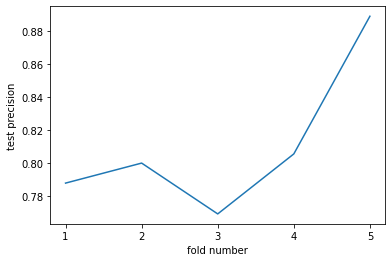

In [88]:
plt.plot(['1','2','3','4','5'], scores['test_precision'])
plt.ylabel('test precision')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

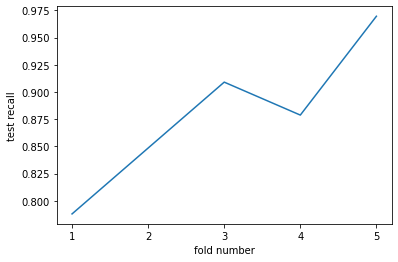

In [89]:
plt.plot(['1','2','3','4','5'], scores['test_recall'])
plt.ylabel('test recall')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

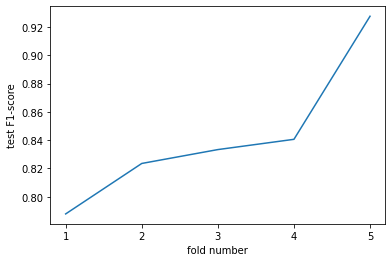

In [90]:
plt.plot(['1','2','3','4','5'], scores['test_f1_score'])
plt.ylabel('test F1-score')
plt.xlabel('fold number')

In [91]:
avg_precision = sum(scores['test_precision'])/len(scores['test_precision'])
avg_recall = sum(scores['test_recall'])/len(scores['test_recall'])
avg_f1_score = sum(scores['test_f1_score'])/len(scores['test_f1_score'])

In [92]:
print('precision=',avg_precision)
print('recall=',avg_recall)
print('f1-score=',avg_f1_score)

precision= 0.8103108003108002
recall= 0.8787878787878789
f1-score= 0.8425714950011625


# 12.

In [93]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [94]:
scoring = { 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [95]:
scores = cross_validate(neigh, data, y, cv=5, scoring=scoring)

In [96]:
avg_precision = sum(scores['test_precision'])/len(scores['test_precision'])
avg_recall = sum(scores['test_recall'])/len(scores['test_recall'])
avg_f1_score = sum(scores['test_f1_score'])/len(scores['test_f1_score'])

In [97]:
print('precision=',avg_precision)
print('recall=',avg_recall)
print('f1-score=',avg_f1_score)

precision= 0.7811300661703888
recall= 0.8121212121212121
f1-score= 0.7950634741075918


In [98]:
nneighs = [5, 10, 15, 20, 30]
recalls = []
precisions = []
f1_scores = []
accs = []

In [99]:
from sklearn.neighbors import KNeighborsClassifier
for i in nneighs:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(data, y)
    
    scoring = { 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
            'accuracy' : make_scorer(accuracy_score)}
    scores = cross_validate(neigh, data, y, cv=5, scoring=scoring)
    precisions.append(sum(scores['test_precision'])/len(scores['test_precision']))
    recalls.append(sum(scores['test_recall'])/len(scores['test_recall']))
    f1_scores.append(sum(scores['test_f1_score'])/len(scores['test_f1_score']))
    accs.append(sum(scores['test_accuracy'])/len(scores['test_accuracy']))

Text(0.5, 0, 'fold number')

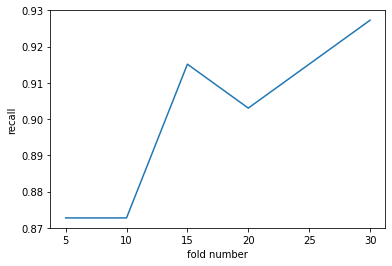

In [100]:
plt.plot(nneighs, recalls)
plt.ylabel('recall')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

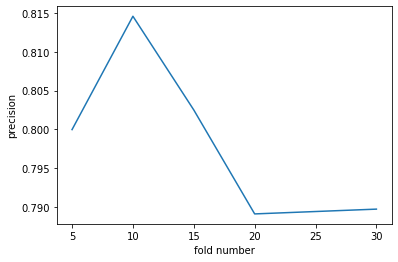

In [101]:
plt.plot(nneighs, precisions)
plt.ylabel('precision')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

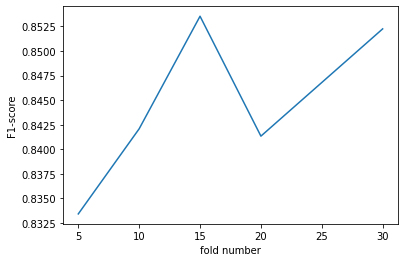

In [102]:
plt.plot(nneighs, f1_scores)
plt.ylabel('F1-score')
plt.xlabel('fold number')

# 13.

# 14.

In [103]:
nneighs = [5, 10, 15, 20, 30]
recalls = []
precisions = []
f1_scores = []
accs = []

In [104]:
from sklearn.neighbors import KNeighborsClassifier
for i in nneighs:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(data, y)
    
    scoring = { 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
            'accuracy' : make_scorer(accuracy_score)}
    scores = cross_validate(neigh, data[['chol','thalach','trestbps']], y, cv=5, scoring=scoring)
    precisions.append(sum(scores['test_precision'])/len(scores['test_precision']))
    recalls.append(sum(scores['test_recall'])/len(scores['test_recall']))
    f1_scores.append(sum(scores['test_f1_score'])/len(scores['test_f1_score']))
    accs.append(sum(scores['test_accuracy'])/len(scores['test_accuracy']))

Text(0.5, 0, 'fold number')

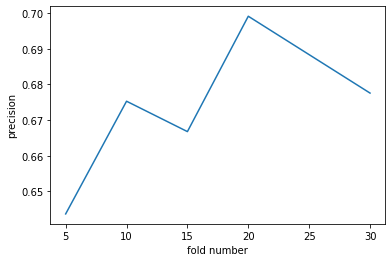

In [105]:
plt.plot(nneighs, precisions)
plt.ylabel('precision')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

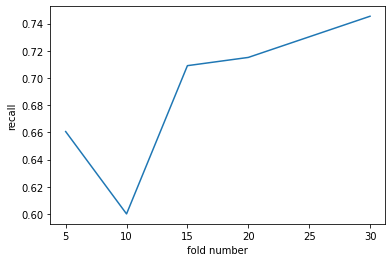

In [106]:
plt.plot(nneighs, recalls)
plt.ylabel('recall')
plt.xlabel('fold number')

Text(0.5, 0, 'fold number')

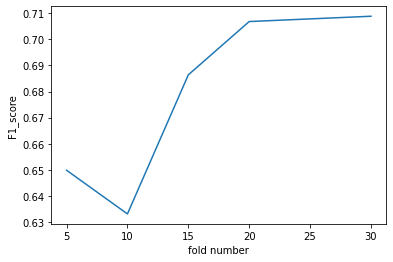

In [107]:
plt.plot(nneighs, f1_scores)
plt.ylabel('F1_score')
plt.xlabel('fold number')

# 15, 16